In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
boston=pd.read_csv('housing.csv')

In [4]:
boston.head(2)

,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7


CRIM per capita crime rate by town
ZN proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS proportion of non-retail business acres per town
CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX nitric oxides concentration (parts per 10 million)
RM average number of rooms per dwelling
AGE proportion of owner-occupied units built prior to 1940
DIS weighted distances to five Boston employment centres
RAD index of accessibility to radial highways
TAX full-value property-tax rate per 10,000usd
PTRATIO pupil-teacher ratio by town
B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT % lower status of the population

In [6]:
features=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','PRICE']

In [7]:
boston.columns=features

In [8]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


In [9]:
boston.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

In [10]:
boston['RAD']=boston['RAD'].astype('float')

In [11]:
boston.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

In [12]:
boston.nunique()

CRIM       451
ZN          26
INDUS       76
CHAS        16
NOX        132
RM         436
AGE        399
DIS        360
RAD         10
TAX         67
PTRATIO     85
B          374
LSTAT      444
PRICE      210
dtype: int64

In [13]:
# check for missing values
boston.isnull().sum()

CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX         0
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT       0
PRICE      54
dtype: int64

In [14]:
print(boston['PRICE'])

0      21.6
1      34.7
2      33.4
3      36.2
4      28.7
       ... 
500    22.4
501    20.6
502    23.9
503    22.0
504    11.9
Name: PRICE, Length: 505, dtype: float64


In [15]:
x=boston['PRICE'].mean()

In [16]:
x

23.74988913525499

In [17]:
boston['PRICE']=boston['PRICE'].fillna(x)

In [18]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [19]:
boston.duplicated().sum()

0

In [20]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,1.271696,13.285941,9.218812,0.141044,1.102290,15.697830,58.731877,6.177433,78.215842,339.403564,42.669069,332.664158,11.550792,23.749889
std,2.400926,23.070598,7.170151,0.313012,1.648432,27.244172,33.135624,6.482191,203.715008,180.838910,87.663630,125.414151,6.063900,8.332582
min,0.000000,0.000000,0.000000,0.000000,0.385000,3.561000,1.137000,1.129600,1.000000,20.200000,2.600000,0.320000,1.730000,6.300000
25%,0.049810,0.000000,3.440000,0.000000,0.449000,5.961000,32.000000,2.429800,4.000000,254.000000,17.000000,364.610000,6.900000,19.000000
50%,0.144760,0.000000,6.960000,0.000000,0.538000,6.319000,65.300000,3.917500,5.000000,307.000000,18.900000,390.640000,10.400000,22.700000
75%,0.825260,18.100000,18.100000,0.000000,0.647000,6.951000,90.000000,6.336100,24.000000,403.000000,20.200000,395.600000,15.020000,25.000000
max,9.966540,100.000000,27.740000,1.000000,7.313000,100.000000,100.000000,24.000000,666.000000,711.000000,396.900000,396.900000,34.410000,50.000000


# EDA

In [21]:
# correlation in regreesion type of problem ( To check for multi colinearity- relation bet independent features)
boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.288847,0.586414,-0.068038,-0.139860,-0.185466,0.462818,-0.313297,-0.152455,0.754362,-0.140393,-0.052753,0.391658,-0.281452
ZN,-0.288847,1.000000,-0.491669,-0.005662,0.038595,0.078869,-0.488124,0.268486,0.062932,-0.256727,0.049625,0.015608,-0.390123,0.330707
INDUS,0.586414,-0.491669,1.000000,-0.186941,-0.395544,-0.449910,0.701741,-0.607206,-0.429011,0.749224,-0.352118,0.234723,0.464484,-0.369316
CHAS,-0.068038,-0.005662,-0.186941,1.000000,0.585123,0.585331,-0.269506,0.523643,0.587537,-0.347856,0.470732,-0.495728,0.010309,0.124876
NOX,-0.139860,0.038595,-0.395544,0.585123,1.000000,0.975762,-0.550017,0.923487,0.985955,-0.570607,0.775255,-0.856583,0.079055,-0.021735
RM,-0.185466,0.078869,-0.449910,0.585331,0.975762,1.000000,-0.595745,0.946935,0.992620,-0.611224,0.806483,-0.848264,0.028769,0.017137
AGE,0.462818,-0.488124,0.701741,-0.269506,-0.550017,-0.595745,1.000000,-0.744048,-0.585533,0.635850,-0.476991,0.417142,0.415270,-0.240806
DIS,-0.313297,0.268486,-0.607206,0.523643,0.923487,0.946935,-0.744048,1.000000,0.947597,-0.689487,0.766178,-0.778031,-0.081160,0.042343
RAD,-0.152455,0.062932,-0.429011,0.587537,0.985955,0.992620,-0.585533,0.947597,1.000000,-0.586837,0.805514,-0.861656,0.055445,-0.007631
TAX,0.754362,-0.256727,0.749224,-0.347856,-0.570607,-0.611224,0.635850,-0.689487,-0.586837,1.000000,-0.485389,0.373167,0.283861,-0.273782


In [22]:
import seaborn as sns
#sns.pairplot(boston)

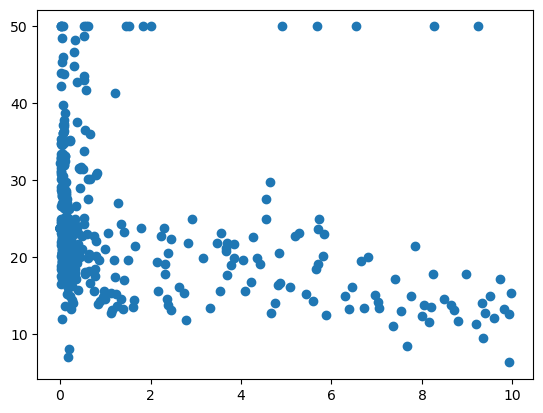

In [23]:
plt.scatter(boston['CRIM'],boston['PRICE'])

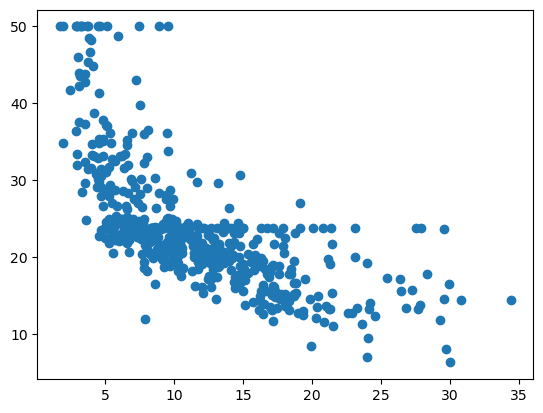

In [24]:
plt.scatter(boston['LSTAT'],boston['PRICE'])

<Axes: xlabel='LSTAT', ylabel='PRICE'>

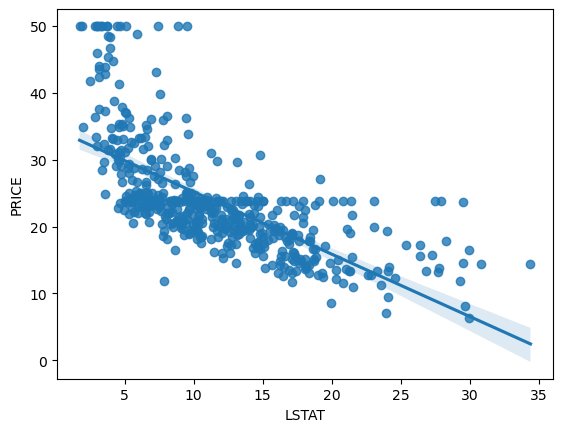

In [25]:
sns.regplot(x='LSTAT',y='PRICE',data=boston)

In [26]:
# Independent and Dependent Feature
X=boston.iloc[:,:-1]
Y=boston.iloc[:,-1]

In [27]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
1,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
2,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
3,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
4,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21


In [28]:
Y.head()

0    21.6
1    34.7
2    33.4
3    36.2
4    28.7
Name: PRICE, dtype: float64

In [29]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [30]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,0.08829,12.5,7.87,0.00,0.524,6.012,66.6000,5.5605,5.0,311.0,15.20,395.60,12.43
116,0.15098,0.0,10.01,0.00,0.547,6.021,82.6000,2.7474,6.0,432.0,17.80,394.51,10.30
45,0.18836,0.0,6.91,0.00,0.448,5.786,33.3000,5.1004,3.0,233.0,17.90,396.90,14.15
16,0.78420,0.0,8.14,0.00,0.538,5.990,81.7000,4.2579,4.0,307.0,21.00,386.75,14.67
467,0.00000,18.1,0.00,0.58,5.926,71.000,2.9084,24.0000,666.0,20.2,368.74,18.13,19.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.13117,0.0,8.56,0.00,0.520,6.127,85.2000,2.1224,5.0,384.0,20.90,387.69,14.09
270,0.16211,20.0,6.96,0.00,0.464,6.240,16.3000,4.4290,3.0,223.0,18.60,396.90,6.59
348,0.02899,40.0,1.25,0.00,0.429,6.939,34.5000,8.7921,1.0,335.0,19.70,389.85,5.89
435,0.00000,18.1,0.00,0.74,6.461,93.300,2.0026,24.0000,666.0,20.2,27.49,18.05,9.60


In [31]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.08447,0.0,4.05,0.0,0.510,5.859,68.7,2.7019,5.0,296.0,16.6,393.23,9.64
274,0.09604,40.0,6.41,0.0,0.447,6.854,42.8,4.2673,4.0,254.0,17.6,396.90,2.98
490,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07
72,0.19539,0.0,10.81,0.0,0.413,6.245,6.2,5.2873,4.0,305.0,19.2,377.17,7.54
305,0.07503,33.0,2.18,0.0,0.472,7.420,71.9,3.0992,7.0,222.0,18.4,396.90,6.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,9.72418,0.0,18.10,0.0,0.740,6.406,97.2,2.0651,24.0,666.0,20.2,385.96,19.52
23,0.75026,0.0,8.14,0.0,0.538,5.924,94.1,4.3996,4.0,307.0,21.0,394.33,16.30
225,0.38214,0.0,6.20,0.0,0.504,8.040,86.5,3.2157,8.0,307.0,17.4,387.38,3.13
432,5.58107,0.0,18.10,0.0,0.713,6.436,87.9,2.3158,24.0,666.0,20.2,100.19,16.22


In [32]:
# Standardize Dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [33]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [35]:
X_train

array([[-0.50805109, -0.06403121, -0.19599615, ..., -0.31767946,
         0.50166147,  0.15944085],
       [-0.48139402, -0.60643418,  0.09609762, ..., -0.28857156,
         0.49297237, -0.19288379],
       [-0.46549929, -0.60643418, -0.32702887, ..., -0.28745203,
         0.51202461,  0.44394714],
       ...,
       [-0.53326666,  1.12925532, -1.09957596, ..., -0.26730041,
         0.45582447, -0.92234467],
       [-0.5455938 ,  0.17896532, -1.27019148, ..., -0.18008868,
        -2.50803566, -0.30867123],
       [-0.45561291, -0.60643418, -0.10181638, ..., -0.253866  ,
         0.4926535 ,  0.32650559]])

In [36]:
# Linear Regression
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

regression.fit(X_train,Y_train)


LinearRegression()

In [37]:
print(regression.coef_)


[  0.9660488    1.93273019  -1.2715131    1.05231157  -1.05814958
   0.52726248   0.91703213 -10.51547945   9.12867651  -2.38047896
   0.41615172   1.03692503  -5.68722568]


In [38]:
print(regression.intercept_)

24.35876962117548


In [39]:
# on which parameter the model has been trained
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [40]:
## Prediction with Test Data
Y_pred=regression.predict(X_test)
Y_pred

array([28.53461967, 35.1332694 , 13.1289636 , 23.31317507, 35.20778647,
       22.24653447, 24.72955933,  3.72860961, 20.6899949 , 22.63163365,
       29.17068858, 13.4920638 , 25.38500706, 22.50357881, 23.11735806,
       28.57422471, 22.81310133, 29.81184907, 32.12733928, 19.36999953,
       30.23047724, 32.78077749, 23.34552118, 27.60505862, 20.58961939,
       23.10747907, 29.54697761, 22.29178207, 16.56875244, 21.98005888,
       29.64653127, 15.18351183, 20.92686246, 21.45925148, 17.6119022 ,
       24.56832532, 30.09836998, 24.49357627, 17.42350163, 24.23623594,
       15.57210023, 17.98117862, 23.25260929, 22.42460239, 29.74211174,
       28.54201883, 16.10008758, 21.4021766 , 17.50106093, 25.76995896,
       17.77045871, 36.30479514, 17.03006423, 23.53088164, 27.97859174,
       20.1097774 , 19.73339183, 36.56867744, 28.86029604, 20.82757086,
       22.32204095, 28.33963581, 24.76820338, 24.61374803, 17.45786535,
       22.55095327, 20.90435823, 27.75901483, 37.01721491, 12.62

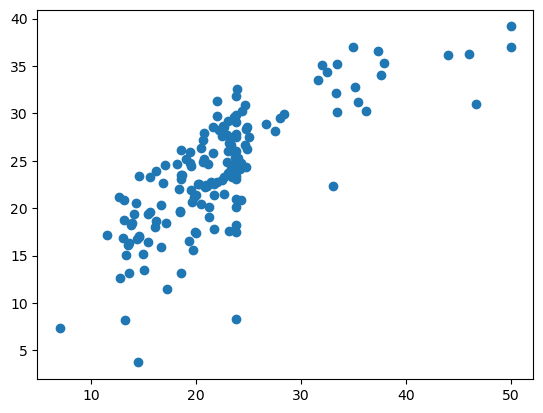

In [41]:
# Scatter plot for prediction
plt.scatter(Y_test,Y_pred)

<Axes: xlabel='PRICE'>

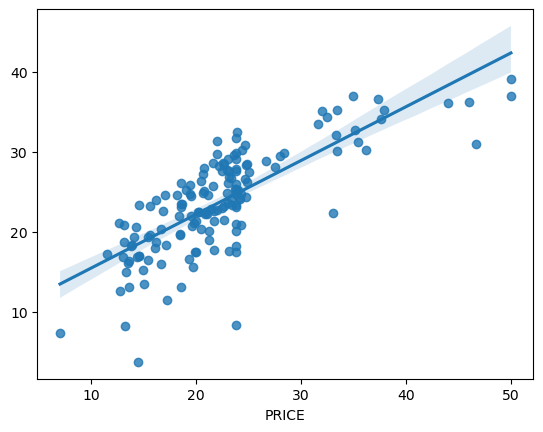

In [45]:
sns.regplot(x=Y_test,y=Y_pred)

In [46]:
## Prediction with residuals
residuals=Y_test-Y_pred
residuals

173   -5.934620
274   -3.133269
490    0.471036
72     0.086825
305   -1.807786
         ...   
440   -1.293387
23    -4.051296
225    3.529262
432   -2.493996
446   -8.562699
Name: PRICE, Length: 152, dtype: float64

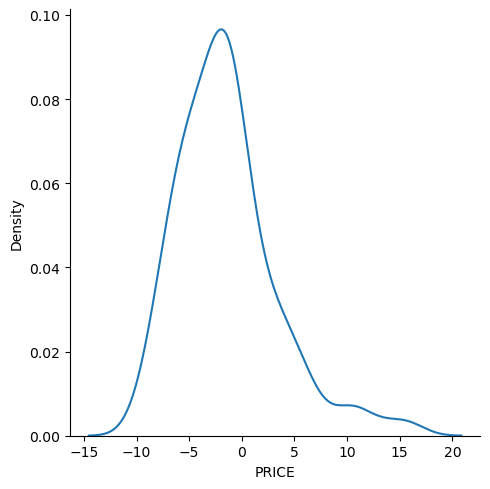

In [48]:
sns.displot(residuals,kind='kde')

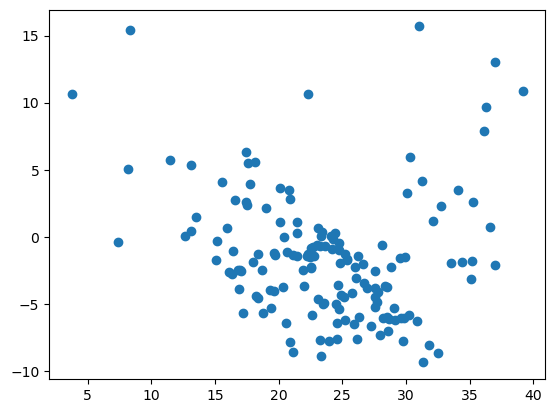

In [49]:
# Scatterplot wrt prediction and residuals ( Uniform Distribution)
plt.scatter(Y_pred,residuals)

In [50]:
# Performance Metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error
print(mean_absolute_error(Y_test,Y_pred))
print(mean_squared_error(Y_test,Y_pred))
print(np.sqrt(mean_squared_error(Y_test,Y_pred)))


3.893577685834128
24.16806311822152
4.916102431624215


# R square & Adjusted R Square
R^2=1-SSR/SST
R^2=Coefficent of determination
SSR=Sum of squared of residuals
SST=Total sum of squares

Adjusted R2=1-[(1-R2)*(n-1)/(n-k-1)]
R2=THe R2 of the model
n=number of observations
k=number of predictors Variables

In [51]:
from sklearn.metrics import r2_score
score=r2_score(Y_test,Y_pred)
print(score)

0.5497436787671148


In [53]:
adjusted_R2=1-(1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)
adjusted_R2

0.5073282282161908

In [61]:
# New Data Prediction
boston.iloc[1,:].values

array([2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
       7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
       1.7800e+01, 3.9283e+02, 4.0300e+00, 3.4700e+01])

In [68]:
X.iloc[1,:].values.shape

(13,)

In [72]:
t=X.iloc[1,:].values.reshape(1,-1)

In [73]:
t.shape

(1, 13)

In [74]:
t

array([[2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00]])

In [75]:
## Transformation of new data
scaler.transform(t)

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.53398954, -0.60643418, -0.30519009, -0.4634645 , -0.39277283,
        -0.32055618,  0.06941309, -0.18939875, -0.38121956, -0.54610783,
        -0.28857156,  0.47957999, -1.23000844]])

In [76]:
regression.predict(scaler.transform(t))

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([30.06555062])

# Pickling the model file for Deployment

In [77]:
import pickle


In [78]:
#  pickle.dump(model name,new model name.pkl,write bit mode)
pickle.dump(regression,open('regmodel.pkl','wb'))

In [79]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [80]:
pickled_model.predict(scaler.transform(t))

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([30.06555062])